# Bankruptcy Prevention 

In [3]:
# import libreries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset 

data = pd.read_excel(r"C:\Users\juwer\Downloads\Bankruptcy (2).xlsx")
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


### EDA (Exploratory Data Analysis)

In [8]:
# check rows and columns 

data.shape

(250, 7)

In [10]:
# check basic information 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [12]:
# check for any null values 

data.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

In [14]:
# summary statistics 

data.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Check for duplicate rows

data.duplicated().sum()

147

In [18]:
# drop duplicate rows 

data = data.drop_duplicates()
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,non-bankruptcy
187,0.0,0.5,0.5,0.5,1.0,0.5,non-bankruptcy
190,0.0,0.5,0.5,0.0,1.0,0.0,non-bankruptcy
192,0.5,1.0,0.0,0.0,1.0,0.0,non-bankruptcy


### Data Visualization

In [21]:
sns.set_style("whitegrid")

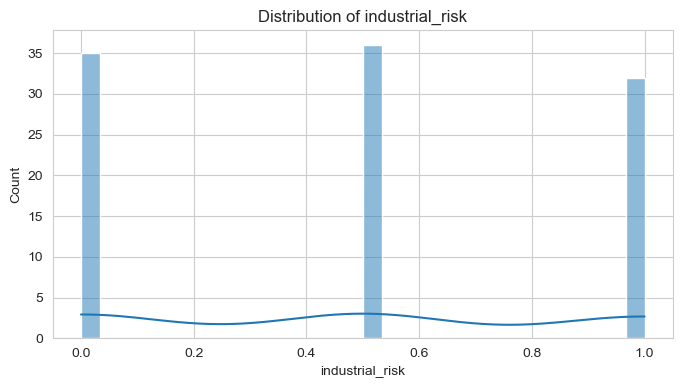

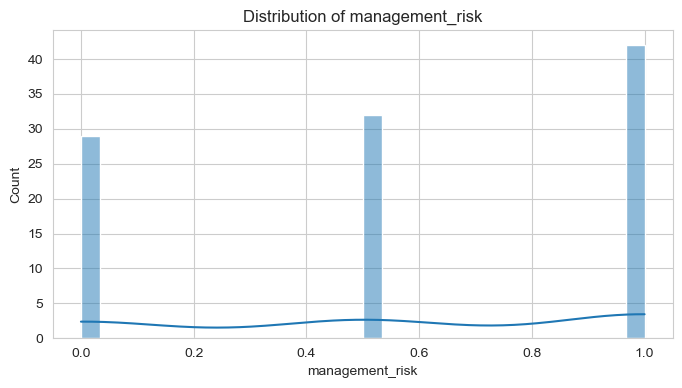

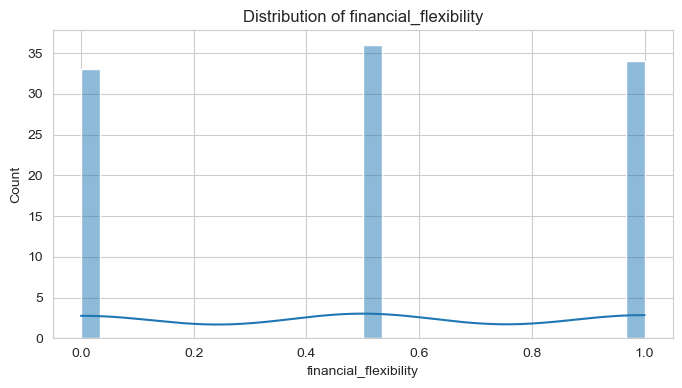

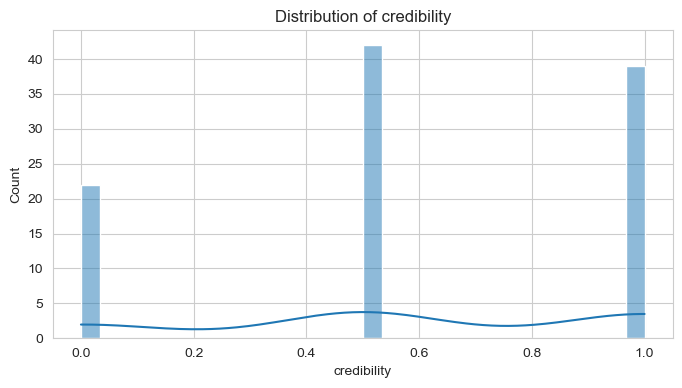

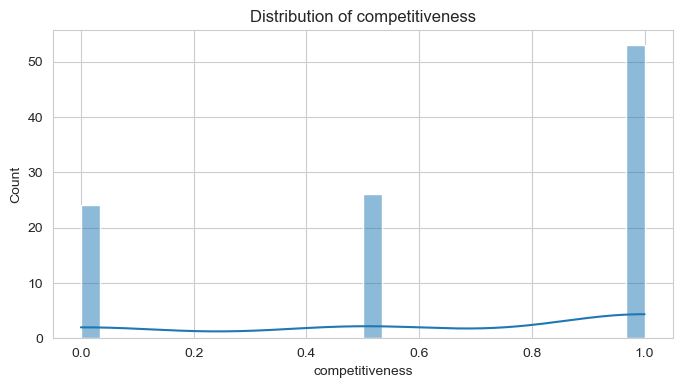

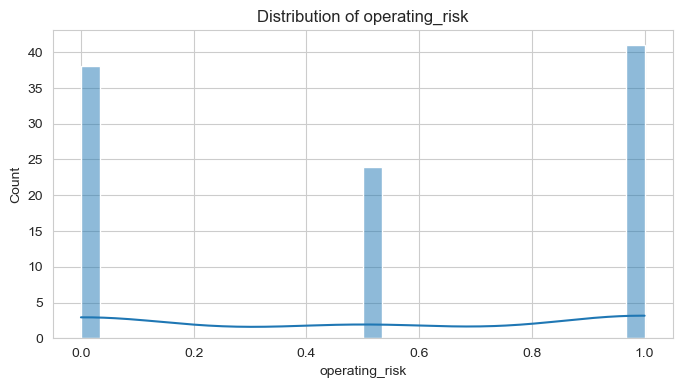

In [23]:
# Distribution plots for numeric columns

numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

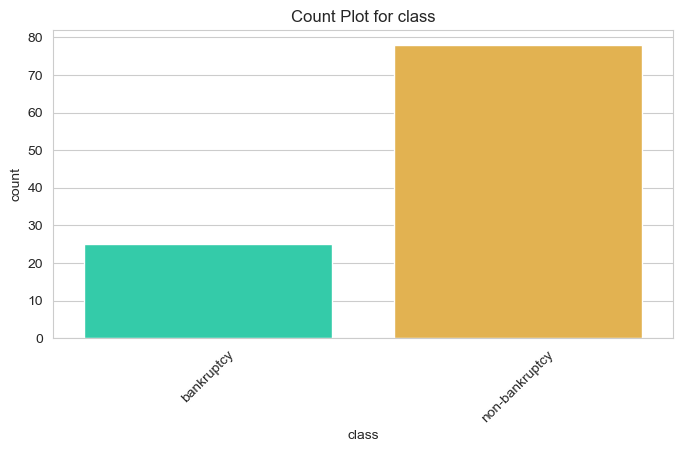

In [25]:
# Count plots for categorical columns

import warnings 
warnings.filterwarnings('ignore')

categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=column, palette = "turbo")
    plt.title(f"Count Plot for {column}")
    plt.xticks(rotation=45)
    plt.show()

In [27]:
# Encode the target variable

target_column = 'class'  
if target_column in data.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    data[target_column] = le.fit_transform(data[target_column])
    print(f"\nEncoded target variable '{target_column}' with mapping: {dict(enumerate(le.classes_))}")
else:
    print(f"\nTarget column '{target_column}' not found in the dataset.")


Encoded target variable 'class' with mapping: {0: 'bankruptcy', 1: 'non-bankruptcy'}


In [29]:
# display data
data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


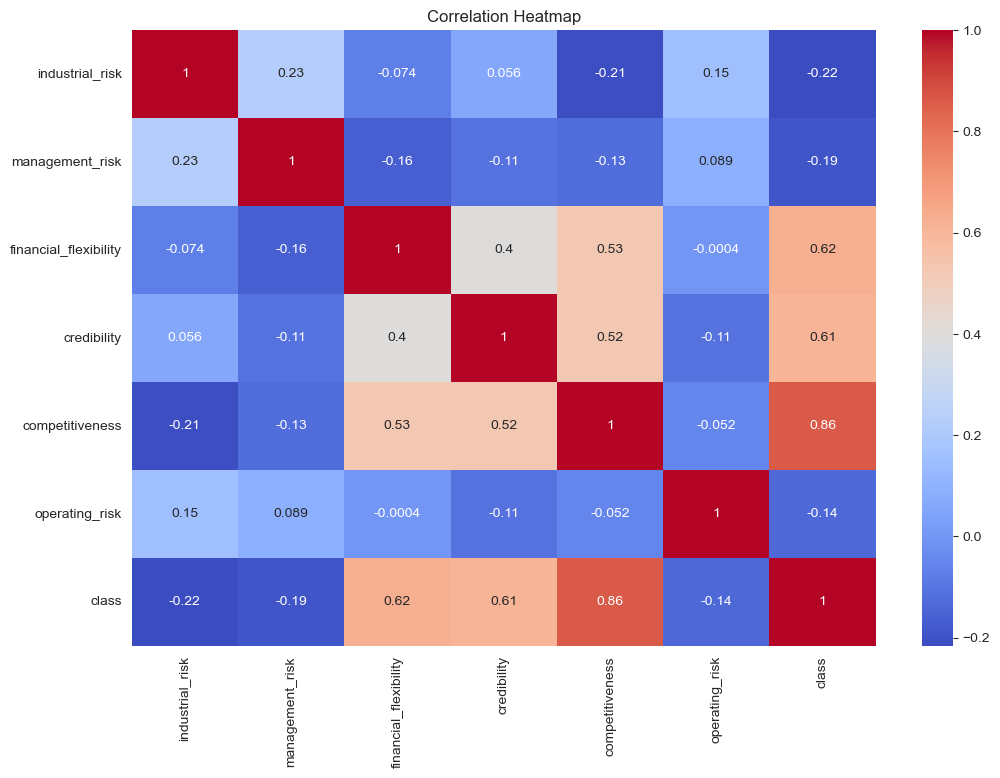

In [31]:
# Correlation heatmap (for numeric features)

plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Renaming the dataset  

cleaned_data = data.iloc[:,:]
cleaned_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,1
187,0.0,0.5,0.5,0.5,1.0,0.5,1
190,0.0,0.5,0.5,0.0,1.0,0.0,1
192,0.5,1.0,0.0,0.0,1.0,0.0,1


### Model building - 1 (Logistic Regression)

In [36]:
from sklearn.model_selection import train_test_split  

In [38]:
# Splitting the data into features and target

X = cleaned_data.drop(columns=[target_column]) # target_column is class
y = cleaned_data[target_column]

In [40]:
# Feature Scaling 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [42]:
# Train-test split(train_dataset (80%) , test_dataset (20%))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Built a logistic regression model

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000)

# Train the model using the training data.
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predict the test set results

In [47]:
y_pred_lr = log_reg.predict(X_test)
y_pred_lr

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### Model Evaluation

In [50]:
# Evaluate the model on the training dataset 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", lr_accuracy)
print("Classification_report:", classification_report(y_test, y_pred_lr))
print("Confusion_matrix:", confusion_matrix(y_test, y_pred_lr))

Accuracy: 0.9523809523809523
Classification_report:               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion_matrix: [[ 4  1]
 [ 0 16]]


### Model Building - 2 (Random Forest Classifier)

In [53]:
# Built a random forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=42)

# Train the model using the training data.
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Predict the test set results

In [56]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

### Model Evaluation

In [59]:
# Evaluate the model on the training dataset 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)
print("Classification_report:", classification_report(y_test, y_pred_rf))
print("Confusion_matrix: ", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9523809523809523
Classification_report:               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.94      1.00      0.97        16

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

Confusion_matrix:  [[ 4  1]
 [ 0 16]]


### Model Building - 3 (K-Nearest Neighbors (KNN))

In [62]:
# Build a KNN Model

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model using the train dataset 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Predict the test set results

In [65]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

### Model Evaluation

In [68]:
# Evaluate a model on the trained dataset
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)
print("confusion_matrix:", confusion_matrix(y_test, y_pred_knn))
print("classification_report:", classification_report(y_test, y_pred_knn))

Accuracy: 1.0
confusion_matrix: [[ 5  0]
 [ 0 16]]
classification_report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        16

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Comparion of Models

In [71]:
# Comparison of Models

print("\nComparison of Model Accuracies:")
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'K-Nearest Neighbors'],
    'Accuracy': [lr_accuracy, rf_accuracy, knn_accuracy]
})
print(model_comparison)


Comparison of Model Accuracies:
                 Model  Accuracy
0  Logistic Regression  0.952381
1        Random Forest  0.952381
2  K-Nearest Neighbors  1.000000


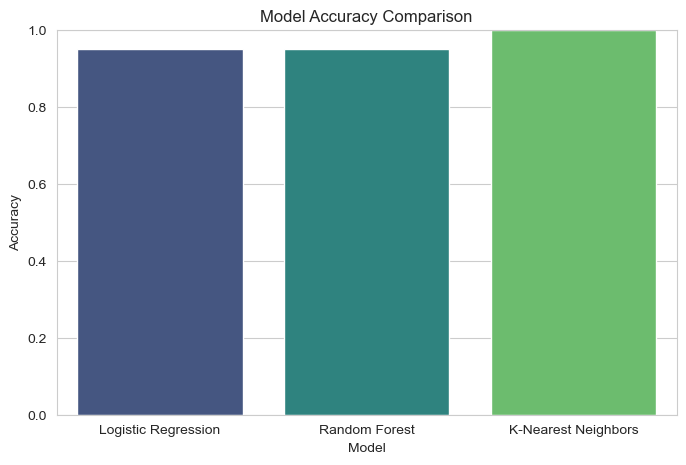

In [73]:
# Plot the comparison

plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

### Explanation and Summary of Analysis

1. Dataset Overview:
   * The dataset was loaded from an Excel file.
   * Initial exploration revealed its structure, missing values, and duplicates, which were handled to ensure data integrity.

2. Preprocessing:
   *  duplicate values were removed.
   *  The target variable, presumed to be categorical, was encoded using LabelEncoder to transform it into numerical format for model training.

3. Data Visualization:
    * Distribution Plots: Explored the spread of numerical features to understand feature distributions.
    * Count Plots: Visualized categorical feature distributions for balanced or imbalanced classes.
    * Correlation Heatmap: Showed relationships among numeric features, identifying potential multicollinearity.
      
4. Model Building:
    * The dataset was split into training and testing sets (80%-20% split).
    * Three models were built and evaluated:
        * Logistic Regression: A simple linear model often effective for binary classification problems.
        * Random Forest Classifier: A robust ensemble model using decision trees for better accuracy.
        * K-Nearest Neighbors (KNN): A distance-based classification algorithm.

5. Model Evaluation:
    * Each model was evaluated on the test set using accuracy and classification reports (precision, recall, F1-score).
    * The accuracy scores were summarized:
       * Logistic Regression: ~{lr_accuracy:.2f}
       * Random Forest: ~{rf_accuracy:.2f}
       * KNN: ~{knn_accuracy:.2f}
    * A bar chart compared the accuracies of the three models, aiding in visualizing their relative performance.

### Key Observations:

* Logistic Regression offers a baseline for comparison with a good accuracy.
* Random Forest is likely to perform well due to its ability to handle non-linear relationships and overfitting through ensemble averaging.
* KNN’s performance depends heavily on feature scaling and the choice of k, but it provides an intuitive classification approach.

### Conclusion:

* The K-Nearest Neighbors (KNN) model performed best in terms of accuracy, suggesting its suitability for this dataset.
* However, the choice of the final model should also consider computational efficiency, explainability, and real-world application context.